## As a data-scientist you have to build an image classification model to classify 2 categories of images namely cat and dogs.


In [1]:
# import all required libraries

import os
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
import numpy as np

In [2]:
input_dir = "C:/Users/ASUS/Desktop/Image Classification Project"

In [3]:
categories = ["cats", "dogs"]
for category in categories:
    for file in os.listdir(os.path.join(input_dir,category)):
        img_path = os.path.join(input_dir,category,file)
        print(img_path)

C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.0.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.1.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.10.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.100.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.101.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.102.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.103.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.104.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.105.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.106.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.107.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.108.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.109.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cats\cat.11.jpg
C:/Users/ASUS/Desktop/Image Classification Project\cat

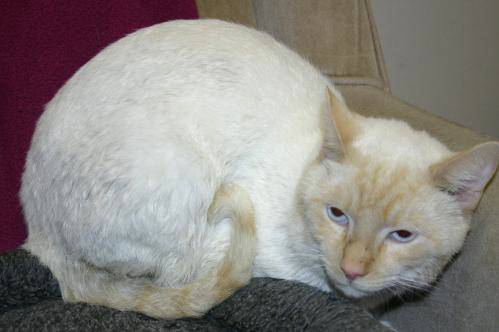

In [4]:
# taking any random path of previous output to display the image.

Image.open("C:/Users/ASUS/Desktop/Image Classification Project/cats/cat.56.jpg")

### Image conversion to array

In [5]:
# converting the image to numpy array

img_path = "C:/Users/ASUS/Desktop/Image Classification Project/cats/cat.56.jpg"

img = imread(img_path)
print(img)

[[[ 62  13  32]
  [ 58   9  28]
  [ 56   7  26]
  ...
  [102  98  87]
  [102  98  87]
  [102  98  87]]

 [[ 57   8  27]
  [ 56   7  26]
  [ 55   6  25]
  ...
  [102  98  87]
  [102  98  87]
  [102  98  87]]

 [[ 55   6  25]
  [ 56   7  26]
  [ 57   8  27]
  ...
  [102  98  87]
  [102  98  87]
  [102  98  87]]

 ...

 [[ 60  62  61]
  [ 56  58  57]
  [ 48  50  49]
  ...
  [ 90  92  89]
  [ 90  92  89]
  [ 90  92  89]]

 [[ 52  54  53]
  [ 49  51  50]
  [ 43  45  44]
  ...
  [ 90  92  91]
  [ 90  92  91]
  [ 90  92  91]]

 [[ 42  44  43]
  [ 40  42  41]
  [ 36  38  37]
  ...
  [ 91  93  92]
  [ 91  93  92]
  [ 91  93  92]]]


In [6]:
# Resizing and flattening the numpy array.

img = resize(img,(15,15))
img

array([[[0.23961588, 0.04255303, 0.12248486],
        [0.25770606, 0.04799379, 0.13998994],
        [0.26251191, 0.05072221, 0.14474673],
        [0.28253729, 0.0620607 , 0.15871018],
        [0.31101686, 0.11325785, 0.19711415],
        [0.38163607, 0.23067294, 0.26951935],
        [0.46260219, 0.40135859, 0.33205583],
        [0.44777235, 0.41474557, 0.34865642],
        [0.4591831 , 0.4310296 , 0.38064635],
        [0.4742373 , 0.42729256, 0.35911246],
        [0.46359803, 0.42066622, 0.35095591],
        [0.46840402, 0.45402349, 0.42134867],
        [0.45502011, 0.45152275, 0.43162059],
        [0.42974273, 0.42640178, 0.39120731],
        [0.41249004, 0.39916998, 0.36271538]],

       [[0.24523959, 0.04539578, 0.13180814],
        [0.26197424, 0.05068162, 0.14441515],
        [0.27666458, 0.06940603, 0.16137985],
        [0.40339229, 0.24227018, 0.30709794],
        [0.60948583, 0.54057833, 0.54605897],
        [0.70844688, 0.68298536, 0.65167144],
        [0.72592696, 0.71200103,

In [7]:
img = img.flatten()

#### Converting all the images into a 1-D array and storing it into data variable. Here Label contains two categories i.e 0 (Cat) and 1 (Dog)


In [8]:
# creating two empty list as data and labels

data = []
labels = []

In [9]:
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir,category,file)
        img = imread(img_path)
        img = resize(img,(15,15))
        data.append(img.flatten())
        labels.append(category_idx)

In [10]:
labels = np.asarray(labels)
data = np.asarray(data)

# Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,shuffle=True,stratify=labels)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.56

# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)


0.56

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.6525

### Hyperparameter Tuning - Random Forest

In [14]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
param_grid = {
    'n_estimators' : [200, 500],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_
rfc1 = RandomForestClassifier(random_state = 42, max_features = 'auto', n_estimators = 200, max_depth = 8, criterion = 'gini')
rfc1.fit(x_train, y_train)
pred = rfc1.predict(x_test)
print("Accuracy for Random Forest on data: ", accuracy_Score(y_test,pred))


In [ ]:
# creating the dataframe for actual and predicted value.

pd.DataFrame({"Actual_Value": y_test, "Predicted_Value": y_pred})